# Optimization for Logistic Regression

The logistic regression is a regression model which tries to predict the probability that a given observation belongs to the success state of a binary class. It does this by fitting a set of parameters $\{\beta_i\}_{i=1}^p$ in the following model.

\begin{equation*}
    \hat{y}_i=\frac{1}{1+\exp(-\beta^T\textbf{x}_i)}=\varphi(\beta;\textbf{x}_i)
\end{equation*}

The predictions $\hat{y}\in(0,1)$ are the mentioned probabilities that a particular observation $\textbf{x}$ belongs to the class. These parameters can be determined using the method of maximum likelihood. This method aims to maximize the probability of the observed data given our model. Since the output variable is binary, it can be modeled by a random variable which follows a Bernoulli distribution where the probability of success is precisely $\varphi(\beta;\textbf{x})$.

\begin{equation*}
    \mathcal{L}=Pr(Y_1=y_1,...,Y_n=y_n)=\prod_{i=1}^n\varphi(\beta;\textbf{x}_i)^{y_i}(1-\varphi(\beta;\textbf{x}_i))^{(1-\varphi(\beta;\textbf{x}_i))}
\end{equation*}

Where we have assumed all the observations are independent. For the sake of simplicity, the problem is usually presented as the maximization of the log-likelihood $\log\mathcal{L}$. Therefore, our optimization problem is the maximization of the following unconstraint non-linear function:

\begin{equation*}
    \max_{\beta}\sum_{i=1}^ny_i\log\varphi(\beta;\textbf{x}_i)+\sum_{i=1}^n(1-y_i)\log\left[1-\varphi(\beta;\textbf{x}_i)\right]
\end{equation*}

#### a) Generate random data $\{(x_i; y_i)\}_{i=1}^n$ to be later used to adjust the logistic model. Set the number of observations to generate as $n = 1000$, and the number of variables for each observation as $p = 20$.

In [101]:
import numpy as np
import time

## Define problem size
nobs = 1000
nvars = 20

## Set the seed for reproducibility
np.random.seed(42)  #the seed has been set to have a good balance between the binary classes

## Set the parameters of the model
betas = np.random.randint(-10, 11, [nvars+1,1])

## Simulate observations and create the matrix for algebraic formulation
X_intercept = np.ones([nobs, 1]) 
X0 = np.random.normal(0, 1/3, ([nobs, nvars]))
X = np.concatenate([X_intercept, X0], axis=1)

## Generate errors and compute linear relation
errors = np.random.normal(0, 0.1, nobs)
eta = np.dot(X, betas).flatten() + errors

## Apply the inverse of the link to obtain binary data
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y = np.zeros([len(eta),1])
for i, y_lin in enumerate(eta):
    y[i] = np.random.binomial(1, sigmoid(y_lin)) 

## Print the values
print('Values of the original coefficients:')
for i in range(nvars + 1):
    print('beta %d %6.1f' %(i, betas[i]))

Values of the original coefficients:
beta 0   -4.0
beta 1    9.0
beta 2    4.0
beta 3    0.0
beta 4   -3.0
beta 5   10.0
beta 6   -4.0
beta 7    8.0
beta 8    0.0
beta 9    0.0
beta 10   10.0
beta 11   -7.0
beta 12   -3.0
beta 13   -8.0
beta 14   10.0
beta 15   -9.0
beta 16    1.0
beta 17   -5.0
beta 18   -9.0
beta 19   10.0
beta 20  -10.0


C:\Users\jures\AppData\Local\Temp\ipykernel_13220\2823107265.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('beta %d %6.1f' %(i, betas[i]))


To check that the data have been correctly generated, we will now plot the linear relationship between $y_{lin}$ and the first four variables. In addition, we will show the number of instances which belong to each class in $y_{bin}$.

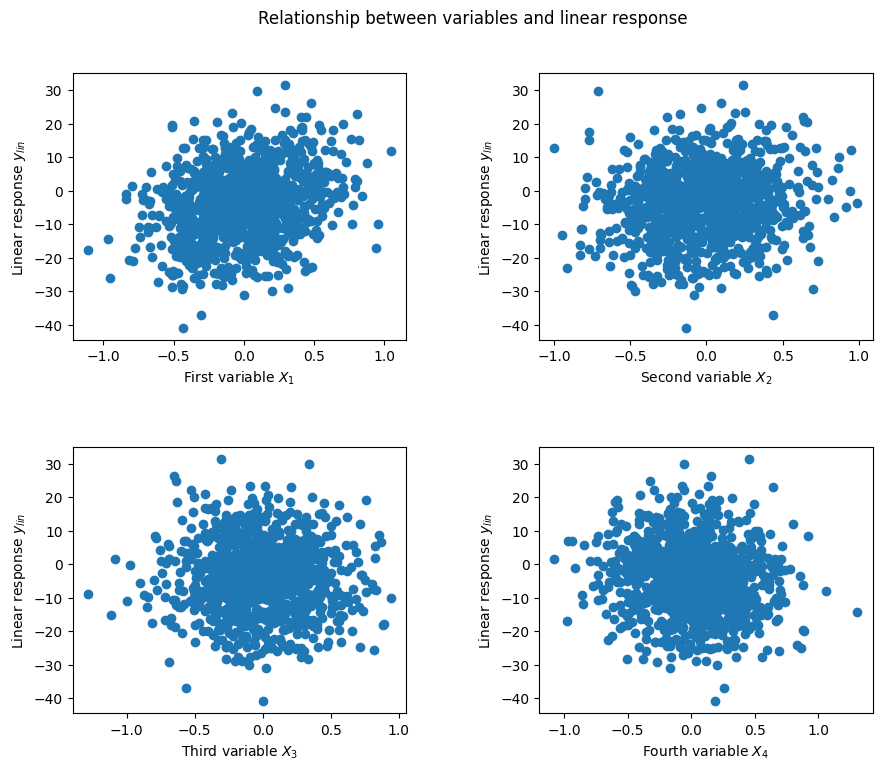

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.scatter(X[:,1], eta),
plt.xlabel('First variable $X_1$'),plt.ylabel('Linear response $y_{lin}$')

plt.subplot(2, 2, 2)
plt.scatter(X[:,2], eta)
plt.xlabel('Second variable $X_2$'),plt.ylabel('Linear response $y_{lin}$')

plt.subplot(2, 2, 3)
plt.scatter(X[:,3], eta)
plt.xlabel('Third variable $X_3$'),plt.ylabel('Linear response $y_{lin}$')

plt.subplot(2, 2, 4)
plt.scatter(X[:,4], eta)
plt.xlabel('Fourth variable $X_4$'),plt.ylabel('Linear response $y_{lin}$')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace = 0.4, hspace = 0.4)
plt.suptitle("Relationship between variables and linear response")
plt.show()

In [103]:
n0 = np.count_nonzero(y == 0)
n1 = np.count_nonzero(y == 1)

print(f"Number of 0s in y_bin: {n0}")
print(f"Number of 1s in y_bin: {n1}")

Number of 0s in y_bin: 647
Number of 1s in y_bin: 353


#### b) Using the generated dataset, compute the regression coefficients with Sklearn. By default this provides the solution to the maximum likelihood problem and can be used as a benchmark in the following sections.

In [104]:
from sklearn import linear_model
from time import time

## Start timer
start_time = time()

## Fit logistic model
regr = linear_model.LogisticRegression(fit_intercept=False, penalty="none")
regr.fit(X,y)

##Stop timer
end_time = time()

## Print the results
betas = regr.coef_[0,:].reshape(21,1)
print('Values of the maximum likelihood coefficients:')
for i in range(nvars + 1):
    print('beta %d %7.3f' %(i, betas[i]))
print('Elapsed time = %8.5f' %(end_time - start_time))

Values of the maximum likelihood coefficients:
beta 0  -3.949
beta 1   8.629
beta 2   4.673
beta 3  -0.707
beta 4  -3.535
beta 5   9.779
beta 6  -3.728
beta 7   8.245
beta 8   0.184
beta 9  -0.085
beta 10   8.808
beta 11  -6.098
beta 12  -2.523
beta 13  -6.700
beta 14   9.487
beta 15  -9.115
beta 16   0.380
beta 17  -4.480
beta 18  -8.646
beta 19   9.419
beta 20 -10.229
Elapsed time =  0.01449


C:\Users\jures\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\jures\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\361326377.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('beta %d %7.3f' %(i, betas[i]))


#### c) Estimate the value of the regression coefficients by using the function minimize from the Python module Scipy.optimize. Choose four different solution algorithms ('method') and compare their performance (number of iterations, function and gradient evaluations and computational times). You would need to create functions defining the objective function value, its gradient and its hessian.

Before writing the code let us first compute the gradient and the Hessian of the objective function. Let us start by noticing the following two properties of the sigmoid function $\varphi(\beta;\textbf{x})$:

\begin{equation*}
    \frac{1}{\varphi(\beta;\textbf{x}_i)}\frac{\partial \varphi(\beta;\textbf{x}_i)}{\partial \beta} = \frac{\textbf{x}_i}{1+\exp(\beta^T\textbf{x}_i)} = \varphi(\beta;-\textbf{x}_i)\textbf{x}_i
\end{equation*}

\begin{equation*}
    \frac{1}{1-\varphi(\beta;\textbf{x}_i)}\frac{\partial \varphi(-\beta;\textbf{x}_i)}{\partial \beta} = \frac{\textbf{x}_i}{1+\exp(-\beta^T\textbf{x}_i)} = \varphi(\beta;\textbf{x}_i)\textbf{x}_i
\end{equation*}

Therefore, the gradient of the log-likelihood can be written as follows.

\begin{equation*}
    \frac{\partial \log\mathcal{L}}{\partial\beta} = \sum_{i=1}^n\left(\left[y_i(\varphi(\beta;\textbf{x}_i)+\varphi(\beta;-\textbf{x}_i))-\varphi(\beta;\textbf{x}_i)\right]\textbf{x}_i\right)
\end{equation*}

This can be reduced further by using this identity.

\begin{equation*}
    \varphi(\beta;\textbf{x}_i)+\varphi(\beta;-\textbf{x}_i)= \frac{1}{1+\exp(-\beta^T\textbf{x}_i)}+\frac{1}{1+\exp(\beta^T\textbf{x}_i)}=1
\end{equation*}

Thus, the final gradient for the log-likelihood is:

\begin{equation*}
    \frac{\partial \log\mathcal{L}}{\partial\beta} =\sum_{i=1}^n\left[(y_i-\varphi(\beta;\textbf{x}_i))\textbf{x}_i\right]
\end{equation*}

In [105]:
def ML_reg(betas, X, y):
    eta = np.dot(X, betas)
    phi = sigmoid(eta)
    s = np.dot(y.T, np.log(phi))
    f = np.dot((1 - y).T, np.log(1 - phi))
    return - (s + f) 

def ML_reg_der(betas, X, y):
    eta = np.dot(X, betas)
    phi = sigmoid(eta)
    return - np.dot(X.T, (y-phi))

Note that these function return the negative value of the OF/gradient. This is because the library scipy.optimize.minimize only works for minimization problems. For this reason, we have to introduce a negative sign to achieve the solution to our maximization problem. 

Let us now compute the expression for the Hessian. A component of the Hessian matrix is then given by:

\begin{equation*}
    H_{jk}(\log\mathcal{L}) = \frac{\partial^2 \log\mathcal{L}}{\partial\beta_k\partial\beta_j} = -\sum_{i=1}^n\frac{\partial \varphi(\beta;\textbf{x}_i)}{\partial \beta_k}x_{ij} 
\end{equation*}

Where $x_{ij} = (\textbf{x}_i)_j$ refers to the j-th component of the i-th observation. In the matrix of obsercations X, this component coincides with $X_{ij}$. Explicitely writing the partial derivative and after some manipulation, the Hessian can be written as follows.

\begin{equation*}
    H_{jk}(\log\mathcal{L}) = \sum_{i=1}^n\varphi(\beta;\textbf{x}_i)\left[\varphi(\beta;\textbf{x}_i)-1\right]x_{ij}x_{ik}
\end{equation*}

\begin{equation*}
    \Longrightarrow \quad H(\log\mathcal{L}) = \sum_{i=1}^n\varphi(\beta;\textbf{x}_i)\left[\varphi(\beta;\textbf{x}_i)-1\right]\textbf{x}_i\textbf{x}_i^T
\end{equation*}

In [106]:
def ML_reg_hess(betas, X, y):
    eta = np.dot(X, betas)
    phi = sigmoid(eta).reshape(1,nobs)
    return - np.dot(phi*(phi-1)*X.T, X)

Once we have computed all of this functions, we can solve the maximization problem using scipy. We will solve it via 4 different methods to compare the results; Nelder-mead method (no gradient or Hessian), Conjugate Gradient method (gradient but no Hessian), Quasi-Newton method (gradient and approximate Hessian) and Newton method (both gradient and Hessian).

To compare the different methods we will use the relative error with respect to the ones obtained using scikit-learn.

\begin{equation*}
    Error = \frac{||\beta-\hat{\beta}||}{||\beta||}
\end{equation*}

In [107]:
from scipy.optimize import minimize

## Solve with Nelder-Mead method
betas0 = np.zeros(nvars+1)
start_time = time()     #start timer

solNM = minimize(ML_reg, betas0, args=(X, y), method='Nelder-Mead', options={'disp': True})  #solve 

end_time = time()       #end timer

## Print results
print('Values of the maximum likelihood coefficients obtained with the Nelder-Mead method:')
for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, solNM.x[i], i, betas[i]))

errorNM = np.linalg.norm(betas.T-solNM.x, ord=2)/np.linalg.norm(betas.T, ord=2)
print('Error in the values of coefficients = %8.5f' %errorNM)
print('Elapsed time = %8.4f' %(end_time - start_time))

Values of the maximum likelihood coefficients obtained with the Nelder-Mead method:
model beta 0  -0.723      sklearn beta 0     -3.949 
model beta 1   1.824      sklearn beta 1      8.629 
model beta 2  -0.163      sklearn beta 2      4.673 
model beta 3   0.066      sklearn beta 3     -0.707 
model beta 4  -1.744      sklearn beta 4     -3.535 
model beta 5   1.103      sklearn beta 5      9.779 
model beta 6  -0.028      sklearn beta 6     -3.728 
model beta 7  -0.199      sklearn beta 7      8.245 
model beta 8  -0.393      sklearn beta 8      0.184 
model beta 9  -0.043      sklearn beta 9     -0.085 
model beta 10   1.317      sklearn beta 10      8.808 
model beta 11  -0.875      sklearn beta 11     -6.098 
model beta 12   0.628      sklearn beta 12     -2.523 
model beta 13  -1.023      sklearn beta 13     -6.700 
model beta 14   0.067      sklearn beta 14      9.487 
model beta 15  -0.804      sklearn beta 15     -9.115 
model beta 16   0.032      sklearn beta 16      0.380 
m

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1466262947.py:7: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  solNM = minimize(ML_reg, betas0, args=(X, y), method='Nelder-Mead', options={'disp': True})  #solve
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1466262947.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, solNM.x[i], i, betas[i]))


In [108]:
from scipy.optimize import minimize

## Solve with Conjugate Gradient method
betas0 = np.zeros(nvars+1)
start_time = time()     #start timer

solCG = minimize(ML_reg, betas0, args=(X, y.flatten()), method='CG', jac=ML_reg_der,
                   options={'disp': True})  #solve 

end_time = time()       #end timer

## Print results
print('Values of the maximum likelihood coefficients obtained with the Gradient method:')
for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, solCG.x[i], i, betas[i]))

errorCG = np.linalg.norm(betas.T-solCG.x, ord=2)/np.linalg.norm(betas.T, ord=2)
print('Error in the values of coefficients = %8.8f' %errorCG)
print('Elapsed time = %8.4f' %(end_time - start_time))

Optimization terminated successfully.
         Current function value: 121.267600
         Iterations: 40
         Function evaluations: 70
         Gradient evaluations: 70
Values of the maximum likelihood coefficients obtained with the Gradient method:
model beta 0  -3.949      sklearn beta 0     -3.949 
model beta 1   8.629      sklearn beta 1      8.629 
model beta 2   4.674      sklearn beta 2      4.673 
model beta 3  -0.707      sklearn beta 3     -0.707 
model beta 4  -3.535      sklearn beta 4     -3.535 
model beta 5   9.779      sklearn beta 5      9.779 
model beta 6  -3.728      sklearn beta 6     -3.728 
model beta 7   8.245      sklearn beta 7      8.245 
model beta 8   0.184      sklearn beta 8      0.184 
model beta 9  -0.085      sklearn beta 9     -0.085 
model beta 10   8.808      sklearn beta 10      8.808 
model beta 11  -6.098      sklearn beta 11     -6.098 
model beta 12  -2.523      sklearn beta 12     -2.523 
model beta 13  -6.700      sklearn beta 13     -6.

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\2378778399.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, solCG.x[i], i, betas[i]))


In [109]:
from scipy.optimize import minimize

## Solve with Quasi-Newton method
betas0 = np.zeros(nvars+1)
start_time = time()     #start timer

solQN = minimize(ML_reg, betas0, args=(X, y.flatten()), method='BFGS', jac=ML_reg_der,
                   options={'disp': True})  #solve 

end_time = time()       #end timer

## Print results
print('Values of the maximum likelihood coefficients obtained with the Quasi-Newton method:')
for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, solQN.x[i], i, betas[i]))

errorQN = np.linalg.norm(betas.T-solQN.x, ord=2)/np.linalg.norm(betas.T, ord=2)
print('Error in the values of coefficients = %8.8f' %errorQN)
print('Elapsed time = %8.4f' %(end_time - start_time))

Optimization terminated successfully.
         Current function value: 121.267600
         Iterations: 45
         Function evaluations: 55
         Gradient evaluations: 55
Values of the maximum likelihood coefficients obtained with the Quasi-Newton method:
model beta 0  -3.949      sklearn beta 0     -3.949 
model beta 1   8.629      sklearn beta 1      8.629 
model beta 2   4.674      sklearn beta 2      4.673 
model beta 3  -0.707      sklearn beta 3     -0.707 
model beta 4  -3.535      sklearn beta 4     -3.535 
model beta 5   9.779      sklearn beta 5      9.779 
model beta 6  -3.728      sklearn beta 6     -3.728 
model beta 7   8.245      sklearn beta 7      8.245 
model beta 8   0.184      sklearn beta 8      0.184 
model beta 9  -0.085      sklearn beta 9     -0.085 
model beta 10   8.808      sklearn beta 10      8.808 
model beta 11  -6.098      sklearn beta 11     -6.098 
model beta 12  -2.523      sklearn beta 12     -2.523 
model beta 13  -6.700      sklearn beta 13    

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1111840691.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, solQN.x[i], i, betas[i]))


In [110]:
from scipy.optimize import minimize

## Solve with Newton method
betas0 = np.zeros(nvars+1)
start_time = time()     #start timer

solNW = minimize(ML_reg, betas0, args=(X, y.flatten()), method='Newton-CG', jac=ML_reg_der,
                   hess=ML_reg_hess, options={'disp': True})  #solve 

end_time = time()       #end timer

## Print results
print('Values of the maximum likelihood coefficients obtained with the Newton method:')
for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, solNW.x[i], i, betas[i]))

errorNW = np.linalg.norm(betas.T-solNW.x, ord=2)/np.linalg.norm(betas.T, ord=2)
print('Error in the values of coefficients = %8.8f' %errorNW)
print('Elapsed time = %8.4f' %(end_time - start_time))

         Current function value: 121.267600
         Iterations: 12
         Function evaluations: 63
         Gradient evaluations: 52
         Hessian evaluations: 13
Values of the maximum likelihood coefficients obtained with the Newton method:
model beta 0  -3.949      sklearn beta 0     -3.949 
model beta 1   8.629      sklearn beta 1      8.629 
model beta 2   4.674      sklearn beta 2      4.673 
model beta 3  -0.707      sklearn beta 3     -0.707 
model beta 4  -3.535      sklearn beta 4     -3.535 
model beta 5   9.779      sklearn beta 5      9.779 
model beta 6  -3.728      sklearn beta 6     -3.728 
model beta 7   8.245      sklearn beta 7      8.245 
model beta 8   0.184      sklearn beta 8      0.184 
model beta 9  -0.085      sklearn beta 9     -0.085 
model beta 10   8.808      sklearn beta 10      8.808 
model beta 11  -6.098      sklearn beta 11     -6.098 
model beta 12  -2.523      sklearn beta 12     -2.523 
model beta 13  -6.700      sklearn beta 13     -6.700 
mo

C:\Users\jures\AppData\Roaming\Python\Python312\site-packages\scipy\optimize\_optimize.py:2133: OptimizeWarning: Warning: Desired error not necessarily achieved due to precision loss.
  return terminate(2, msg)
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1510066503.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, solNW.x[i], i, betas[i]))


As we can see, the Nelder-Mead method is by far the worse of the four in terms of both error and time. The advantage of this method is that no information is required other than the objective function itself. The other three methods have very similar results in terms of error (especially CG and Newton-CG) and differ primarily in the computation time. The best method by both metrics is the Newton method which uses the exact gradient and Hessian. This method is twice as fast as the Quasi-Newton and almost 5 times as fast as the gradient descent.

In terms of iterations, the gradient method needed the most (96) due to having less information for each step. The Quasi-Newton method needed half that number (46) since it approximates the Hessian and therefore the steps are more directed to the optimum. Finally, as expected, the Newton method took only 13 iterations until convergence.

#### d) Estimate the value of the regression coefficients from by implementing the:
- #### **Gradient** method.
- #### **Newton** method.
- #### **Quasi-Newton** method.

#### Compare the performance of these algorithms (number of iterations and total computational time).


First of all, let us define a function that checks the condition for the Armijo rule. This way we can implement the algorithm to update the steplength performing the various methods proposed.

In [111]:
## Armijo rule condition
def Armijo_cond(sigma, ddirect, beta_grad, alpha, grad):
    curr_it = ML_reg(beta_grad, X, y)
    nex_it = ML_reg(beta_grad + alpha*ddirect, X, y)
    lin_aprox = alpha*np.dot(ddirect.T, grad)
    return nex_it > curr_it + sigma*lin_aprox

In [112]:
## Gradient method

n_iter = 50000 #maximum number of iterations
tol = 1e-6 #tolerance for convergence
eps = 10000 #threshold for optimality
sigma = 0.1 #Armijo threshold
delta = 0.1 #Armijo step

## Initialize the variables and data containers

beta_grad = np.zeros([nvars+1,1]) #initial value for the coefficients
OF_iter_grad = np.zeros(n_iter)
eps_iter_grad = np.zeros(n_iter)
alpha_iter_grad = np.zeros(n_iter)

## Implementation
start_time = time() #start timer

i = 0
while (i <= n_iter-2) and (eps > tol):
    i += 1

    ##Compute descent direction
    grad = ML_reg_der(beta_grad, X, y) 
    ddirect = -grad  

    alpha = 0.01 #set step length
    ## Check and implement Armijo rule
    while Armijo_cond(sigma, ddirect, beta_grad, alpha, grad):
        alpha *= delta
    ## Compute next iteration 
    beta_grad += alpha*ddirect
    
    ## Save iterations
    OF_iter_grad[i] = ML_reg(beta_grad, X, y)
    eps = np.abs((OF_iter_grad[i]-OF_iter_grad[i-1])/OF_iter_grad[i-1])
    eps_iter_grad[i] = eps
    alpha_iter_grad[i] = alpha
    
end_time = time() #stop timer

## Print the results
it_grad = i
print('Number of iterations = %5.0f' %it_grad)
print('Objective function   = %11.5f' %OF_iter_grad[i])
print('Optimality threshold = %11.6f' %eps)

for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_grad[i], i, betas[i]))

error_grad = np.linalg.norm(betas-beta_grad, ord=2)/np.linalg.norm(betas, ord=2)
print('Error in the values of coefficients = %8.8f' %error_grad)
time_grad = end_time - start_time
print('Elapsed time = %8.4f' %(time_grad))

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1959540863.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_grad[i] = ML_reg(beta_grad, X, y)
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1959540863.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  eps = np.abs((OF_iter_grad[i]-OF_iter_grad[i-1])/OF_iter_grad[i-1])


Number of iterations =  2010
Objective function   =   121.31803
Optimality threshold =    0.000001
model beta 0  -3.833      sklearn beta 0     -3.949 
model beta 1   8.370      sklearn beta 1      8.629 
model beta 2   4.548      sklearn beta 2      4.673 
model beta 3  -0.685      sklearn beta 3     -0.707 
model beta 4  -3.432      sklearn beta 4     -3.535 
model beta 5   9.479      sklearn beta 5      9.779 
model beta 6  -3.624      sklearn beta 6     -3.728 
model beta 7   7.982      sklearn beta 7      8.245 
model beta 8   0.169      sklearn beta 8      0.184 
model beta 9  -0.075      sklearn beta 9     -0.085 
model beta 10   8.536      sklearn beta 10      8.808 
model beta 11  -5.904      sklearn beta 11     -6.098 
model beta 12  -2.450      sklearn beta 12     -2.523 
model beta 13  -6.499      sklearn beta 13     -6.700 
model beta 14   9.196      sklearn beta 14      9.487 
model beta 15  -8.843      sklearn beta 15     -9.115 
model beta 16   0.373      sklearn beta 1

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1959540863.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_grad[i], i, betas[i]))


In [113]:
## Quasi-Newton BFGS method

n_iter = 5000 #maximum number of iterations
tol = 1e-6 #tolerance for convergence
eps = 10000 #threshold for optimality
sigma = 0.1 #Armijo threshold
delta = 0.1 #Armijo step

## Initialize the variables and data containers

beta_qnew = np.zeros([nvars+1,1]) #initial value for the coefficients
#B = ML_reg_hess(betas, X, y) #initial value for the Hessian approximation
B = np.eye(nvars+1)
OF_iter_qnew = np.zeros(n_iter)
eps_iter_qnew = np.zeros(n_iter)
alpha_iter_qnew = np.zeros(n_iter)

## Implementation
start_time = time() #start timer

i = 0
while (i <= n_iter-2) and (eps > tol):
    i += 1

    ##Compute descent direction
    grad = ML_reg_der(beta_qnew, X, y) 
    ddirect = -np.dot(np.linalg.inv(B), grad) 
    
    alpha = 0.01 #set step length
    ## Check and implement Armijo rule
    while Armijo_cond(sigma, ddirect, beta_qnew, alpha, grad):
        alpha *= delta

    ## Compute next iteration 
    S = alpha*ddirect 
    Y = ML_reg_der(beta_qnew + S, X, y) - ML_reg_der(beta_qnew, X, y)
    B += np.dot(Y, Y.T)/np.dot(Y.T, S) - np.dot(np.dot(B, S), np.dot(B, S).T)/np.dot(np.dot(S.T, B), S) 
    beta_qnew += S
    
    ## Save iterations
    OF_iter_qnew[i] = ML_reg(beta_qnew, X, y)
    eps = np.abs((OF_iter_qnew[i]-OF_iter_qnew[i-1])/OF_iter_qnew[i-1])
    eps_iter_qnew[i] = eps
    alpha_iter_qnew[i] = alpha
    
end_time = time() #stop timer

## Print the results
it_qnew = i
print('Number of iterations = %5.0f' %it_qnew)
print('Objective function   = %11.5f' %OF_iter_qnew[i])
print('Optimality threshold = %11.6f' %eps)

for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_qnew[i], i, betas[i]))

error_qnew = np.linalg.norm(betas-beta_qnew, ord=2)/np.linalg.norm(betas, ord=2)
print('Error in the values of coefficients = %8.8f' %error_qnew)
time_qnew = end_time - start_time
print('Elapsed time = %8.4f' %(time_qnew))

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\900476849.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_qnew[i] = ML_reg(beta_qnew, X, y)
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\900476849.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  eps = np.abs((OF_iter_qnew[i]-OF_iter_qnew[i-1])/OF_iter_qnew[i-1])


Number of iterations =   695
Objective function   =   121.27362
Optimality threshold =    0.000001
model beta 0  -3.910      sklearn beta 0     -3.949 
model beta 1   8.539      sklearn beta 1      8.629 
model beta 2   4.629      sklearn beta 2      4.673 
model beta 3  -0.699      sklearn beta 3     -0.707 
model beta 4  -3.499      sklearn beta 4     -3.535 
model beta 5   9.675      sklearn beta 5      9.779 
model beta 6  -3.691      sklearn beta 6     -3.728 
model beta 7   8.154      sklearn beta 7      8.245 
model beta 8   0.179      sklearn beta 8      0.184 
model beta 9  -0.081      sklearn beta 9     -0.085 
model beta 10   8.714      sklearn beta 10      8.808 
model beta 11  -6.029      sklearn beta 11     -6.098 
model beta 12  -2.497      sklearn beta 12     -2.523 
model beta 13  -6.631      sklearn beta 13     -6.700 
model beta 14   9.386      sklearn beta 14      9.487 
model beta 15  -9.020      sklearn beta 15     -9.115 
model beta 16   0.377      sklearn beta 1

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\900476849.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_qnew[i], i, betas[i]))


In [114]:
## Newton method

n_iter = 5000 #maximum number of iterations
tol = 1e-6 #tolerance for convergence
eps = 10000 #threshold for optimality
sigma = 0.1 #Armijo threshold
delta = 0.1 #Armijo step

## Initialize the variables and data containers

beta_new = np.zeros([nvars+1,1]) #initial value for the coefficients
OF_iter_new = np.zeros(n_iter)
eps_iter_new = np.zeros(n_iter)
alpha_iter_new = np.zeros(n_iter)

## Implementation
start_time = time() #start timer

i = 0
while (i <= n_iter-2) and (eps > tol):
    i += 1

    ##Compute descent direction
    grad = ML_reg_der(beta_new, X, y) 
    hess = ML_reg_hess(beta_new, X, y)
    ddirect = -np.dot(np.linalg.inv(hess),grad) 

    alpha = 0.01 #set step length
    ## Check and implement Armijo rule
    while Armijo_cond(sigma, ddirect, beta_new, alpha, grad):
        alpha *= delta

    ## Compute next iteration 
    beta_new += alpha*ddirect
    
    ## Save iterations
    OF_iter_new[i] = ML_reg(beta_new, X, y)
    eps = np.abs((OF_iter_new[i]-OF_iter_new[i-1])/OF_iter_new[i-1])
    eps_iter_new[i] = eps
    alpha_iter_new[i] = alpha
    
end_time = time() #stop timer

## Print the results
it_new = i
print('Number of iterations = %5.0f' %it_new)
print('Objective function   = %11.5f' %OF_iter_new[i])
print('Optimality threshold = %11.6f' %eps)

for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_new[i], i, betas[i]))

error_new = np.linalg.norm(betas-beta_new, ord=2)/np.linalg.norm(betas, ord=2)
print('Error in the values of coefficients = %8.8f' %error_new)
time_new = end_time - start_time
print('Elapsed time = %8.4f' %(time_new))

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1002224870.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_new[i] = ML_reg(beta_new, X, y)
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1002224870.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  eps = np.abs((OF_iter_new[i]-OF_iter_new[i-1])/OF_iter_new[i-1])


Number of iterations =   823
Objective function   =   121.27359
Optimality threshold =    0.000001
model beta 0  -3.908      sklearn beta 0     -3.949 
model beta 1   8.539      sklearn beta 1      8.629 
model beta 2   4.630      sklearn beta 2      4.673 
model beta 3  -0.699      sklearn beta 3     -0.707 
model beta 4  -3.499      sklearn beta 4     -3.535 
model beta 5   9.675      sklearn beta 5      9.779 
model beta 6  -3.691      sklearn beta 6     -3.728 
model beta 7   8.154      sklearn beta 7      8.245 
model beta 8   0.180      sklearn beta 8      0.184 
model beta 9  -0.082      sklearn beta 9     -0.085 
model beta 10   8.714      sklearn beta 10      8.808 
model beta 11  -6.031      sklearn beta 11     -6.098 
model beta 12  -2.497      sklearn beta 12     -2.523 
model beta 13  -6.631      sklearn beta 13     -6.700 
model beta 14   9.385      sklearn beta 14      9.487 
model beta 15  -9.021      sklearn beta 15     -9.115 
model beta 16   0.376      sklearn beta 1

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1002224870.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_new[i], i, betas[i]))


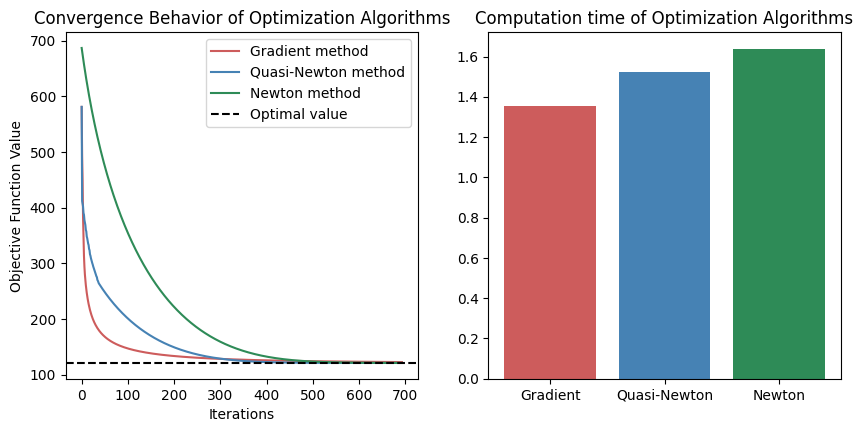

In [115]:
min_it = np.min([it_grad, it_qnew, it_new])
r, b, g = "indianred", "steelblue", "seagreen"
plt.figure(figsize=(10,4.5))

plt.subplot(1,2,1)
plt.plot(OF_iter_grad[1:min_it], r, label="Gradient method")
plt.plot(OF_iter_qnew[1:min_it], b, label="Quasi-Newton method")
plt.plot(OF_iter_new[1:min_it], g, label="Newton method")
plt.axhline(ML_reg(betas, X, y), color='k', linestyle='--', label='Optimal value')
plt.legend()

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Convergence Behavior of Optimization Algorithms')

plt.subplot(1,2,2)
plt.bar(["Gradient","Quasi-Newton","Newton"], [time_grad, time_qnew, time_new], color=[r,b,g])
plt.title('Computation time of Optimization Algorithms')
plt.show()

In terms of performance, the best method is the Newton method, followed by the Quasi-Newton and finally the gradient method. However, it is important to mention that, for a small number of iterations (<200), the best convergence behaviour is that of the gradient method (it has the steepest slope for early iterations).

-|Gradient|Quasi-Newton|Newton|
--------------|-----|---|----|
Iterations  | 2010 | 695 | 823 |
Time (s) | 1.35 | 1.53 | 1.64 |
Error  | 0.0305 | 0.0106 | 0.0106 | 

In terms of both iterations and computation time the Quasi-Newton method is a bit faster than Newton, since it does not have to calculate the whole gradient, but just an approximation. However, the error is slightly higher than for the exact Newton method. The gradient method is the worst of the three.

#### e) Estimate the value of the regression coefficients from by implementing the:
- #### **Coordinate Gradient** method.
- #### **Mini-batch gradient with momentum** method. Study how the mini- batch size may impact the algorithm performance (number of iterations and computational time needed to reach a pre-specified tolerance limit).
- #### **Hessian-free inexact** method.


##### **1. Coordinate Gradient** 
Let us start by implementing coordinate descent. First of all, we need to create a function which calculates the partial derivative with respect only to one variable chosen at random. Another important note is that, since the changes in the objective function are now much smaller for each iteration, the actual stopping criterion is not well-behaved. For this reason, I have decided to change the stopping criterion to the norm of the gradient.

In [116]:
def ML_reg_der_CD(betas, X, y):
    eta = np.dot(X, betas)
    phi = sigmoid(eta)
    idx = np.random.randint(nvars+1)
    grad_coord = np.dot(X[:,idx].T, (y-phi))[0]
    grad_aprox = np.zeros(nvars+1)
    grad_aprox[idx] = grad_coord
    return -grad_aprox.reshape(nvars+1,1)

In [117]:
## Coordinate Gradient method

n_iter = 50000 #maximum number of iterations
tol = 1e-9 #tolerance for convergence
eps = 10000 #threshold for optimality
sigma = 0.1 #Armijo threshold
delta = 0.1 #Armijo step

## Initialize the variables and data containers

beta_CD = np.zeros([nvars+1,1]) #initial value for the coefficients
OF_iter_CD = np.zeros(n_iter)
eps_iter_CD = np.zeros(n_iter)
alpha_iter_CD = np.zeros(n_iter)

## Implementation
start_time = time() #start timer

i = 0
while (i <= n_iter-2) and (eps > tol):
    i += 1

    ##Compute descent direction
    grad_aprox = ML_reg_der_CD(beta_CD, X, y) 
    ddirect = -grad_aprox  

    alpha = 0.01 #set step length
    ## Check and implement Armijo rule
    while Armijo_cond(sigma, ddirect, beta_CD, alpha, grad_aprox):
        alpha *= delta
        
    ## Compute next iteration 
    beta_CD += alpha*ddirect
    
    ## Save iterations
    OF_iter_CD[i] = ML_reg(beta_CD, X, y)
    eps = eps = np.linalg.norm(grad_aprox)
    eps_iter_CD[i] = eps
    alpha_iter_CD[i] = alpha
    
end_time = time() #stop timer

## Print the results
it_CD = i
print('Number of iterations = %5.0f' %it_CD)
print('Objective function   = %11.5f' %OF_iter_CD[i])
print('Optimality threshold = %11.6f' %eps)

for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_CD[i], i, betas[i]))

error_CD = np.linalg.norm(betas-beta_CD, ord=2)/np.linalg.norm(betas, ord=2)
print('Error in the values of coefficients = %8.8f' %error_CD)
time_CD = end_time - start_time
print('Elapsed time = %8.4f' %(time_CD))

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\936335788.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_CD[i] = ML_reg(beta_CD, X, y)


Number of iterations = 49999
Objective function   =   121.28884
Optimality threshold =    0.012614
model beta 0  -3.873      sklearn beta 0     -3.949 
model beta 1   8.460      sklearn beta 1      8.629 
model beta 2   4.591      sklearn beta 2      4.673 
model beta 3  -0.692      sklearn beta 3     -0.707 
model beta 4  -3.468      sklearn beta 4     -3.535 
model beta 5   9.584      sklearn beta 5      9.779 
model beta 6  -3.660      sklearn beta 6     -3.728 
model beta 7   8.072      sklearn beta 7      8.245 
model beta 8   0.175      sklearn beta 8      0.184 
model beta 9  -0.079      sklearn beta 9     -0.085 
model beta 10   8.632      sklearn beta 10      8.808 
model beta 11  -5.971      sklearn beta 11     -6.098 
model beta 12  -2.475      sklearn beta 12     -2.523 
model beta 13  -6.569      sklearn beta 13     -6.700 
model beta 14   9.297      sklearn beta 14      9.487 
model beta 15  -8.938      sklearn beta 15     -9.115 
model beta 16   0.375      sklearn beta 1

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\936335788.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_CD[i], i, betas[i]))


Note that it takes $50000$ iterations and nearly one minute to achieve a similiar result as with the previous methods. This is due to the fact that this algorithm uses only an approximation of the gradient to iterate, and therefore the descent direction is not as efficient as in the exact gradient method.

##### **2. Mini-batch gradient with momentum**

As in the previous implementation, we need to define a separate function that approximates the gradient using only a subset of the data. Since we also want to see the impact of batch size on the convergence of this method, it will be helpful for later to write the algorithm as a function.

In [118]:
def ML_reg_der_Stoc(betas, X, y, batch_size):
    idx = np.random.choice(range(nobs), size=batch_size, replace=False)
    Xbatch = np.matrix(X[idx,:])
    ybatch = np.matrix(y[idx,:])
    eta = np.dot(Xbatch, betas)
    phi = sigmoid(eta)
    return -np.dot(Xbatch.T, (ybatch-phi))

In [119]:
## Mini-Batch stochastic gradient descent method with momentum

def SGD_MiniBatch(X, y, beta_Stoc, batch_size, momentum=0, alpha=1e-4, n_iter=100000, tol=1e-5):
    ## Initialize the variables and data containers
    eps = 10000 
    OF_iter_Stoc = np.zeros(n_iter)
    eps_iter_Stoc = np.zeros(n_iter)
    alpha_iter_Stoc = np.zeros(n_iter)
    DeltaBeta = 0

    ## Implementation
    i = 0
    while (i <= n_iter-2) and (eps > tol):
        i += 1
        
        ##Compute descent direction
        grad_aprox = ML_reg_der_Stoc(beta_Stoc, X, y, batch_size) 
        DeltaBeta = momentum*DeltaBeta - alpha*grad_aprox #step including momentum

        ## Compute next iteration 
        beta_Stoc += DeltaBeta
        
        ## Save iterations
        OF_iter_Stoc[i] = ML_reg(beta_Stoc, X, y)
        eps = np.linalg.norm(grad_aprox)
        eps_iter_Stoc[i] = eps
        alpha_iter_Stoc[i] = alpha

    return beta_Stoc, i, OF_iter_Stoc, eps_iter_Stoc, alpha_iter_Stoc

## Set the parameters for the algorithm
alpha = 0.01 #set step length
n_iter = 50000 #maximum number of iterations
tol = 1e-16 #tolerance for convergence
beta_Stoc = np.zeros([nvars+1,1]) #initial value for the coefficients
batch_size = 10 #size of the mini-batch
p = 0.8 #momentum term

start_time = time() #start timer
beta_Stoc, it_Stoc, OF_iter_Stoc, eps_iter_Stoc, alpha_iter_Stoc = SGD_MiniBatch(X, y, beta_Stoc, batch_size, p, alpha, n_iter, tol)
end_time = time() #stop timer

## Print the results
print('Number of iterations = %5.0f' %it_Stoc)
print('Objective function   = %11.5f' %OF_iter_Stoc[it_Stoc])
print('Optimality threshold = %11.6f' %eps_iter_Stoc[it_Stoc])

for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_Stoc[i], i, betas[i]))

error_Stoc = np.linalg.norm(betas-beta_Stoc, ord=2)/np.linalg.norm(betas, ord=2)
print('Error in the values of coefficients = %8.8f' %error_Stoc)
time_Stoc = end_time - start_time
print('Elapsed time = %8.4f' %(time_Stoc))

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\3221882001.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_Stoc[i] = ML_reg(beta_Stoc, X, y)


Number of iterations = 49999
Objective function   =   122.40269
Optimality threshold =    0.739258
model beta 0  -4.005      sklearn beta 0     -3.949 
model beta 1   8.509      sklearn beta 1      8.629 
model beta 2   4.510      sklearn beta 2      4.673 
model beta 3  -0.570      sklearn beta 3     -0.707 
model beta 4  -3.346      sklearn beta 4     -3.535 
model beta 5   9.567      sklearn beta 5      9.779 
model beta 6  -4.124      sklearn beta 6     -3.728 
model beta 7   8.049      sklearn beta 7      8.245 
model beta 8   0.246      sklearn beta 8      0.184 
model beta 9  -0.380      sklearn beta 9     -0.085 
model beta 10   8.814      sklearn beta 10      8.808 
model beta 11  -6.011      sklearn beta 11     -6.098 
model beta 12  -2.481      sklearn beta 12     -2.523 
model beta 13  -6.663      sklearn beta 13     -6.700 
model beta 14   9.278      sklearn beta 14      9.487 
model beta 15  -8.957      sklearn beta 15     -9.115 
model beta 16   0.492      sklearn beta 1

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\3221882001.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_Stoc[i], i, betas[i]))


This method takes around $30$ seconds to perform $50000$ iterations, achieving a slightly worse resultthan coordinate descent. However, note that for this particular implementation we have chosen a batch of only 10 instances to approximate the gradient and a momentom term of $p=0.80$, which can be improved upon. Regarding the batch size, since the full dataset (1000 instances) is still very small, there is no improvement in computation time with respect to regular gradient, but one would expect this to change with very large datasets.

For this algorithm I have decided not to use the Armijo rule since it takes a lot more time to run and makes the below visualization less clear. For this reason, the step length has to be manually adapted. Let us now see how the batch size and momentum term affect the convergence of this method.

In [120]:
batch_range = [1, 10, 100, 500]
p_range = [0.0, 0.50, 0.90, 0.99]
iter_vec = [100000, 30000, 2000, 500]
Conv = []

for i, batch in enumerate(batch_range):
    for p in p_range:
        opt_res = SGD_MiniBatch(X, y, np.zeros([nvars+1,1]), batch, p, tol=1e-16, n_iter=iter_vec[i])
        Conv.append([batch, p, opt_res[2]])

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\3221882001.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_Stoc[i] = ML_reg(beta_Stoc, X, y)


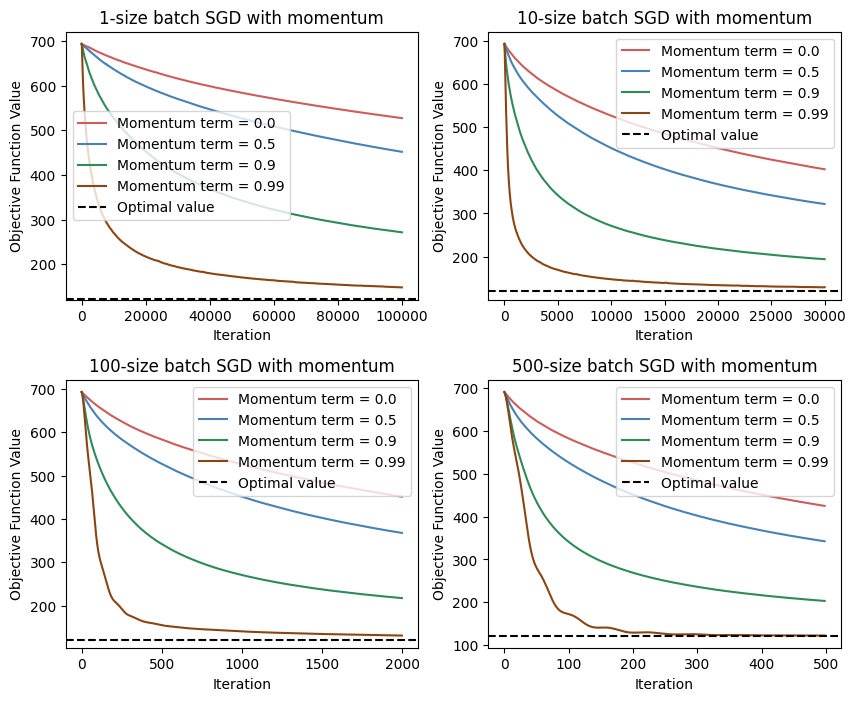

In [121]:
col = ["indianred", "steelblue", "seagreen", "saddlebrown"]
plt.figure(figsize=[10,8])

for i, batch in enumerate(batch_range):
    plt.subplot(2,2,i+1)

    for j, p in enumerate(p_range):
        plt.plot(Conv[len(batch_range)*i + j][2][1:], col[j], label=f"Momentum term = {p}")

    plt.axhline(ML_reg(betas, X, y), color='k', linestyle='--', label='Optimal value')
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.title(f"{batch}-size batch SGD with momentum")
    plt.legend()

plt.subplots_adjust(hspace=0.3)
plt.show()

We can see that the method improves substantially the bigger the batch, this is, the larger the sample of the data we use to calculate the gradient. In addition, it is also clear that the value of the momentum term has a big effect in the convergence behaviour of the algorithm. However, we will now show that if the momentum is too big it can completely kill convergence, since the step might be too large to actually guide the method to the minimum. 

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\3221882001.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_Stoc[i] = ML_reg(beta_Stoc, X, y)
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1311435796.py:5: RuntimeWarning: divide by zero encountered in log
  f = np.dot((1 - y).T, np.log(1 - phi))
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\2823107265.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\1311435796.py:4: RuntimeWarning: divide by zero encountered in log
  s = np.dot(y.T, np.log(phi))


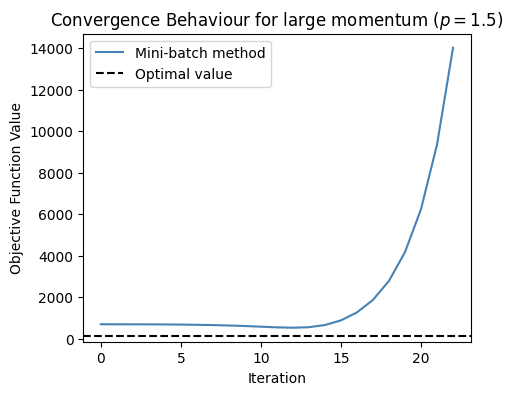

In [122]:
opt_res = SGD_MiniBatch(X, y, np.zeros([nvars+1,1]), batch_size=100, momentum=1.5, tol=1e-5, n_iter=1000)
of_val = opt_res[2]
maxit = opt_res[1]

plt.figure(figsize=[5,4])

plt.plot(of_val[1:maxit], "steelblue", label="Mini-batch method")

plt.axhline(ML_reg(betas, X, y), color='k', linestyle='--', label='Optimal value')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title(r"Convergence Behaviour for large momentum ($p=1.5$)")
plt.legend()

plt.show()

##### **3. Hessian-free inexact method**

Finally, we will implement the hessian free inexact method. This method is similar to the implementation above, with the difference that it also approximates the hessian using only a sample of the data. To this end, we define the functions for the approximated gradient and Hessian. Since we will be using different size batches to calculate the gradient and the Hessian, we need to introduce a term $s_{batch}^{-1}$ to compensate the different sizes.

In [127]:
def ML_reg_der_HF(beta_HF, X, y):
    siz = 100
    idx = np.random.choice(range(nobs), size=siz, replace=False)
    Xsub = np.matrix(X[idx,:])
    ysub = np.matrix(y[idx,:])
    eta = np.dot(Xsub, beta_HF)
    phi = sigmoid(eta)
    return -np.dot(Xsub.T, (ysub-phi))/siz

def ML_reg_hess_HF(beta_HF, X, y):
    siz = 500
    idx = np.random.choice(range(nobs), size=siz, replace=False)
    Xsub = np.array(X[idx,:]).reshape(siz,nvars+1)
    eta = np.dot(Xsub, beta_HF)
    phi = np.array(sigmoid(eta)).reshape(1,siz)
    return -np.dot(phi*(phi-1)*Xsub.T, Xsub)/siz

In [124]:
## Hessian-free inexact method

alpha = 0.01
n_iter = 50000 #maximum number of iterations
tol = 1e-5 #tolerance for convergence
eps = 10000 #threshold for optimality
sigma = 0.1 #Armijo threshold
delta = 0.1 #Armijo step

## Initialize the variables and data containers

beta_HF = np.zeros([nvars+1,1]) #initial value for the coefficients
OF_iter_HF = np.zeros(n_iter)
eps_iter_HF = np.zeros(n_iter)
alpha_iter_HF = np.zeros(n_iter)

## Implementation
start_time = time() #start timer

i = 0
while (i <= n_iter-2) and (eps > tol):
    i += 1

    ##Compute descent direction
    grad_aprox = ML_reg_der_HF(beta_HF, X, y) 
    hess_aprox = ML_reg_hess_HF(beta_HF, X, y)
    ddirect = -np.dot(np.linalg.inv(hess_aprox),grad_aprox) 

    ## Compute next iteration 
    beta_HF += alpha*ddirect
    
    ## Save iterations
    OF_iter_HF[i] = ML_reg(beta_HF, X, y)
    eps = np.linalg.norm(ddirect)
    eps_iter_HF[i] = eps
    alpha_iter_HF[i] = alpha
    
end_time = time() #stop timer

## Print the results
it_HF = i
print('Number of iterations = %5.0f' %it_HF)
print('Objective function   = %11.5f' %OF_iter_HF[i])
print('Optimality threshold = %11.6f' %eps)

for i in range(nvars+1):
    print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_HF[i], i, betas[i]))

error_HF = np.linalg.norm(betas-beta_HF, ord=2)/np.linalg.norm(betas, ord=2)
print('Error in the values of coefficients = %8.8f' %error_HF)
time_HF = end_time - start_time
print('Elapsed time = %8.4f' %(time_HF))

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\2619335254.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_HF[i] = ML_reg(beta_HF, X, y)


Number of iterations = 49999
Objective function   =   121.72267
Optimality threshold =    7.853014
model beta 0  -4.006      sklearn beta 0     -3.949 
model beta 1   8.693      sklearn beta 1      8.629 
model beta 2   4.752      sklearn beta 2      4.673 
model beta 3  -0.626      sklearn beta 3     -0.707 
model beta 4  -3.606      sklearn beta 4     -3.535 
model beta 5   9.836      sklearn beta 5      9.779 
model beta 6  -3.557      sklearn beta 6     -3.728 
model beta 7   8.480      sklearn beta 7      8.245 
model beta 8   0.147      sklearn beta 8      0.184 
model beta 9   0.050      sklearn beta 9     -0.085 
model beta 10   8.939      sklearn beta 10      8.808 
model beta 11  -6.112      sklearn beta 11     -6.098 
model beta 12  -2.489      sklearn beta 12     -2.523 
model beta 13  -6.789      sklearn beta 13     -6.700 
model beta 14   9.795      sklearn beta 14      9.487 
model beta 15  -9.143      sklearn beta 15     -9.115 
model beta 16   0.209      sklearn beta 1

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\2619335254.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f      sklearn beta %d %10.3f ' %(i, beta_HF[i], i, betas[i]))


For this last method we can see that the error comparing with the benchmark is moreless the same as the coordinate gradient, but it takes more time that the other 2 algorithms since it is necessary to approximate the Hessian as well. For this implementation I have used a batch of 100 instances to approximate the gradient and 50 to estimate the Hessian.

#### f) Consider the constrained problem:

\begin{align*}
    \max_{\beta} & \sum_{i=1}^ny_i\log\varphi(\beta;\textbf{x}_i)+\sum_{i=1}^n(1-y_i)\log\left[1-\varphi(\beta;\textbf{x}_i)\right] \\
    \text{s.t.:} & \\
    & \sum_{j=0}^p \beta_j^2=100\\
\end{align*}

#### Estimate the optimal value of the regression coefficients in by implementing a penalization algorithm

In order to solve the constraint problem we need to write it as an unconstraint problem where the objective function is the constraint objective function plus a penalization term which captures the constraint.

\begin{equation*}
    \max_{\beta} \sum_{i=1}^ny_i\log\varphi(\beta;\textbf{x}_i)+\sum_{i=1}^n(1-y_i)\log\left[1-\varphi(\beta;\textbf{x}_i)\right] - \frac{\rho}{4}\left(\beta^T\beta-100\right)^2
\end{equation*}

This way, if the constraint is not satisfied, the function will recieve a penalization and its value will be further from the maximum. Following the same calculations as with the unconstraint problem, we can calculate the gradient and the Hessian.

\begin{equation*}
    \frac{\partial \log\mathcal{L}}{\partial\beta} =\sum_{i=1}^n\left[(y_i-\varphi(\beta;\textbf{x}_i))\textbf{x}_i\right] - \rho\left(\beta^T\beta-100\right)\beta
\end{equation*}

\begin{equation*}
    H(\log\mathcal{L}) = \sum_{i=1}^n\varphi(\beta;\textbf{x}_i)\left[\varphi(\beta;\textbf{x}_i)-1\right]\textbf{x}_i\textbf{x}_i^T-2\rho\beta\beta^T-\mathbb{I}\rho\left(\beta^T\beta-100\right)
\end{equation*}

In [125]:
def ML_reg_penal(beta_penal, X, y, rho):
    eta = np.dot(X, beta_penal)
    phi = sigmoid(eta)
    s = np.dot(y.T, np.log(phi))
    f = np.dot((1 - y).T, np.log(1 - phi))
    cons = np.dot(beta_penal.T, beta_penal) - 100
    return - (s + f) + rho/4*cons**2

def ML_reg_der_penal(beta_penal, X, y, rho):
    eta = np.dot(X, beta_penal)
    phi = sigmoid(eta)
    cons = np.dot(beta_penal.T, beta_penal) - 100
    return - np.dot(X.T, (y-phi)) + rho*cons*beta_penal

def ML_reg_hess_penal(beta_penal, X, y, rho):
    eta = np.dot(X, beta_penal)
    phi = sigmoid(eta).reshape(1,nobs)
    cons = np.dot(beta_penal.T, beta_penal) - 100
    return - np.dot(phi*(phi-1)*X.T, X) + 2*rho*np.dot(beta_penal,beta_penal.T) + rho*cons*np.eye(nvars+1)

Since we were able to analytically compute the expressions for both the gradient and the Hessian, we will use the Newton method to solve this problem.

C:\Users\jures\AppData\Local\Temp\ipykernel_13220\2345132915.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OF_iter_penal[i] = ML_reg_penal(beta_penal, X, y, rho)
C:\Users\jures\AppData\Local\Temp\ipykernel_13220\2345132915.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  const_error[i] = abs(np.dot(beta_penal.T,beta_penal)-100)


Number of iterations =  2833
Objective function   =   186.86731
Optimality threshold =    0.000000
model beta 0  -1.443
model beta 1   2.863
model beta 2   1.696
model beta 3  -0.178
model beta 4  -1.301
model beta 5   3.255
model beta 6  -1.511
model beta 7   2.569
model beta 8  -0.079
model beta 9   0.031
model beta 10   2.898
model beta 11  -1.865
model beta 12  -0.933
model beta 13  -2.211
model beta 14   3.102
model beta 15  -3.040
model beta 16   0.216
model beta 17  -1.447
model beta 18  -2.812
model beta 19   3.000
model beta 20  -3.525
Error in the constraint = 2.33268339
Elapsed time =   2.4334


C:\Users\jures\AppData\Local\Temp\ipykernel_13220\2345132915.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('model beta %d %7.3f' %(i, beta_penal[i]))


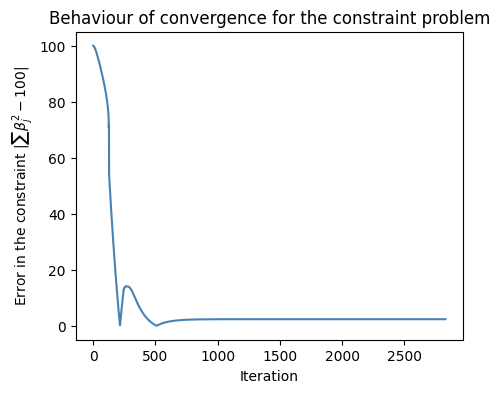

In [131]:
## Newton method

n_iter = 50000 #maximum number of iterations
tol = 1e-9 #tolerance for convergence
eps = 10000 #threshold for optimality
rho = 0.5 #penalization term
alpha = 0.01 #step length

## Initialize the variables and data containers

beta_penal = np.zeros([nvars+1,1]) #initial value for the coefficients
OF_iter_penal = np.zeros(n_iter)
eps_iter_penal = np.zeros(n_iter)
alpha_iter_penal = np.zeros(n_iter)
const_error = np.zeros(n_iter)

## Implementation
start_time = time() #start timer

i = 0
while (i <= n_iter-2) and (eps > tol):
    i += 1

    ##Compute descent direction
    grad = ML_reg_der_penal(beta_penal, X, y, rho) 
    hess = ML_reg_hess_penal(beta_penal, X, y, rho)
    ddirect = -np.dot(np.linalg.inv(hess),grad) 

    ## Compute next iteration 
    beta_penal += alpha*ddirect
    
    ## Save iterations
    OF_iter_penal[i] = ML_reg_penal(beta_penal, X, y, rho)
    eps = np.linalg.norm(grad)
    eps_iter_penal[i] = eps
    alpha_iter_penal[i] = alpha
    const_error[i] = abs(np.dot(beta_penal.T,beta_penal)-100)
    
end_time = time() #stop timer

## Print the results
it_penal = i
print('Number of iterations = %5.0f' %it_penal)
print('Objective function   = %11.5f' %OF_iter_penal[i])
print('Optimality threshold = %11.6f' %eps)

for i in range(nvars+1):
    print('model beta %d %7.3f' %(i, beta_penal[i]))

error_penal = const_error[it_penal]
print('Error in the constraint = %8.8f' %error_penal)
time_penal = end_time - start_time
print('Elapsed time = %8.4f' %(time_penal))

## Plot the error in the constraint
plt.figure(figsize=[5,4])

plt.plot(const_error[1:it_penal], "steelblue")
plt.xlabel("Iteration")
plt.ylabel(r"Error in the constraint $|\sum\beta_j^2-100$|")
plt.title("Behaviour of convergence for the constraint problem")

plt.show()

Although the error of the constraint diminishes noticeably, this is an inexcat method, since in the optimal solution we find that the constraint is not exactly satisfied. A possible way to improve the algorithm would be to add some variability to the $\rho$ inside the loop, so that it can be adapted and impose better the constraint.